# Linear Regression Implementatiton From Scratch

To gain better understanding of how things work in deep learning, defining customized models and our own layers or loss functions is a great start.

## Generating the Dataset

We will generate a dataset containing 1000 examples, each consist of 2 features sampled from standard normal distribution. 

$w = [2, -3.4]^T$ and $b = 4.2$, and $y = Xw + b + \epsilon$

In [1]:
import matplotlib.pyplot as plt
import random
import tensorflow as tf

In [2]:
def synthetic_data(w, b, num_examples):  
    """Generate y = Xw + b + noise."""
    X = tf.zeros((num_examples, w.shape[0]))
    X += tf.random.normal(shape=X.shape)
    y = tf.matmul(X, tf.reshape(w, (-1, 1))) + b
    y += tf.random.normal(shape=y.shape, stddev=0.01)
    y = tf.reshape(y, (-1, 1))
    return X, y

true_w = tf.constant([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [3]:
print('features:', features[0],'\nlabel:', labels[0])

features: tf.Tensor([-0.9947652   0.15375282], shape=(2,), dtype=float32) 
label: tf.Tensor([1.6741477], shape=(1,), dtype=float32)


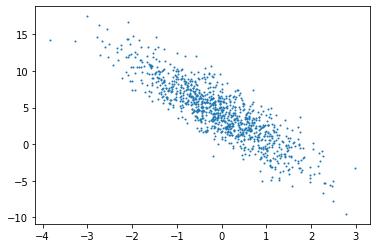

In [4]:
plt.scatter(features[:, (1)].numpy(), labels.numpy(), 1);

## Reading the Dataset 

Training models consist of grabbing one minibatch of examples at a time and using them to update our model so we can define a function that makes this.

In [5]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # Examples should selected randomly
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = tf.constant(indices[i: min(i + batch_size, num_examples)])
        yield tf.gather(features, j), tf.gather(labels, j)

In [6]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tf.Tensor(
[[-2.04113    -0.5002068 ]
 [-0.54543924  0.16806163]
 [-0.53188545 -0.9039335 ]
 [ 0.17010461  0.5023413 ]
 [ 1.45146     0.49659127]
 [-0.9423828  -1.3563963 ]
 [ 0.35496762 -1.4614922 ]
 [ 0.18052462 -1.0709414 ]
 [-0.21931699  0.8153265 ]
 [-0.23667188  0.50636363]], shape=(10, 2), dtype=float32) 
 tf.Tensor(
[[1.8138857]
 [2.529144 ]
 [6.2014346]
 [2.821955 ]
 [5.4242105]
 [6.9174685]
 [9.879992 ]
 [8.1907835]
 [0.9839223]
 [1.9898614]], shape=(10, 1), dtype=float32)


## Initializing Model Parameters

We initialize weights by sampling random numbers from a normal distribuiton with mean 0 and standard deviation of 0.01, and setting the bias to 0

In [7]:
w = tf.Variable(tf.random.normal(shape = (2, 1), mean = 0, stddev = .01),
               trainable = True)
b = tf.Variable(tf.zeros(1), trainable = True)

Now we need to update our parameters so that they fit our data well. Each update requires taking the gradient of our loss function with respect to the parameters. Given this gradient, we can update each parameter in the direction that may reduce the loss.

## Defining the Model

In [8]:
def linreg(X, w, b):
    """The linear regression model."""
    return tf.matmul(X, w) + b

## Defining Loss Function

We are going to use squared loss function.

In [9]:
def squared_loss(y_hat, y):
    return (y_hat - tf.reshape(y, y_hat.shape)) ** 2 / 2

## Defining the Optimization Algorithm

We will use minibatch stochastic gradient descent.

At each step, using one minibatch randomly drawn from our dataset, we will estimate the gradient of the loss with respect to our parameters. Next, we will update our parameters in the direction that may reduce the loss. The following code applies the minibatch stochastic gradient descent update, given a set of parameters, a learning rate, and a batch size. The size of the update step is determined by the learning rate lr. Because our loss is calculated as a sum over the minibatch of examples, we normalize our step size by the batch size (batch_size), so that the magnitude of a typical step size does not depend heavily on our choice of the batch size.

In [10]:
def sgd(params, grads, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    for param, grad in zip(params, grads):
        param.assign_sub(lr*grad / batch_size)

## Training 

In each iteration, we will grab a minibatch of training examples and obtain set of predictions. After calculating the loss we initiate backward pass through network, storing the gradients with respect to each parameter. Finally, we will call the optimization algorithm sgd to update the model parameters.

- Initialize parameters $(w, b)$
- Repeat until done
    - Compute gradient g <- $\partial_{(w,b)}\frac{1}{|B|}\sum l(x^i, y^i, w, b)$
    - Update parameters $(w, b) <- (w, b) - \varphi g$

In [11]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with tf.GradientTape() as g:
            l = loss(net(X, w, b), y)
        # Compute gradient on l with respect to ['w', 'b']
        dw, db = g.gradient(l, [w, b])
        # Update parameters using their gradient
        sgd([w, b], [dw, db], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print(f'epoch = {epoch + 1}, loss = {float(tf.reduce_mean(train_l)):f}')

epoch = 1, loss = 0.025767
epoch = 2, loss = 0.000089
epoch = 3, loss = 0.000050
